In [1]:
import matplotlib.pyplot as plt

In [2]:
def handle_rtt(f):
    x = []
    y = []
    time_zero = 0
    isFirst = False
    for line in f:
        line = line.strip('\n')
        if(line.find('time:')):
            line = line.split(',',1)
            time = line[0]
            line = line[1].split('time=',1)
            if(len(line) > 1):
                if(isFirst == False):
                    time_zero = time
                    isFirst = True
                line = line[1].split(' ')
                rtt = line[0]
                x.append(float(time)-float(time_zero))
                y.append(float(rtt))
    return x,y

In [3]:
def print_plt(x_red, y_red, x_taildrop, y_taildrop, x_codel, y_codel, type):
    plt.plot(x_red,      y_red,       label='RED',       color = 'red')
    plt.plot(x_taildrop, y_taildrop,  label='tail drop', color = 'blue')
    plt.plot(x_codel,    y_codel,     label='CoDel',     color = 'green')
    
    plt.margins(0)
    plt.xlabel("time")
    plt.ylabel(type)
    plt.title(type)
    plt.yscale("log")
    plt.tick_params(axis="both")
    plt.legend()
    plt.show()

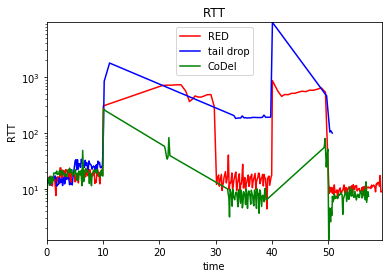

In [4]:
if __name__ == "__main__":

    red_txt = "data/red/rtt.txt"
    taildrop_txt = "data/taildrop/rtt.txt"
    codel_txt = "data/codel/rtt.txt"
    fd_red = open(red_txt)
    fd_taildrop = open(taildrop_txt)
    fd_codel = open(codel_txt)

    x_red, y_red = handle_rtt(fd_red)
    x_taildrop, y_taildrop = handle_rtt(fd_taildrop)
    x_codel, y_codel = handle_rtt(fd_codel)

    print_plt(x_red, y_red, x_taildrop, y_taildrop, x_codel, y_codel, "RTT")
    fd_red.close
    fd_taildrop.close
    fd_codel.close